**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 8**
Regresión Lineal

---

NOMBRE: Carlos Eduardo García García
MATRÍCULA: A01795206
NOMBRE: Francisco Marmolejo Martinez
MATRÍCULA: A01794882
NOMBRE: Hugo Jovan Ramirez Ceron
MATRÍCULA: A00994966
Manuel Enrique Rodríguez Rey
MATRÍCULA: A01795392

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
insurance_df = pd.read_csv('insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# **Parte 1**. EDA

Efectúa una exploración inicial de los datos a través de:

1a) Estadísticas descriptivas para todas las variables del dataframe.

In [3]:
dfNumericalValues = insurance_df.copy().select_dtypes(exclude=['object'])
dfNumericalValues.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
dfCategoricalValues = insurance_df.copy().select_dtypes(include=['object'])
dfCategoricalValues.describe()


,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


1b) Búsqueda de valores faltantes.

In [5]:
insurance_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

1c) Histrogramas y boxplots para las variables cuantitativas y diagramas de barras con la frecuencia para las variables categóricas.

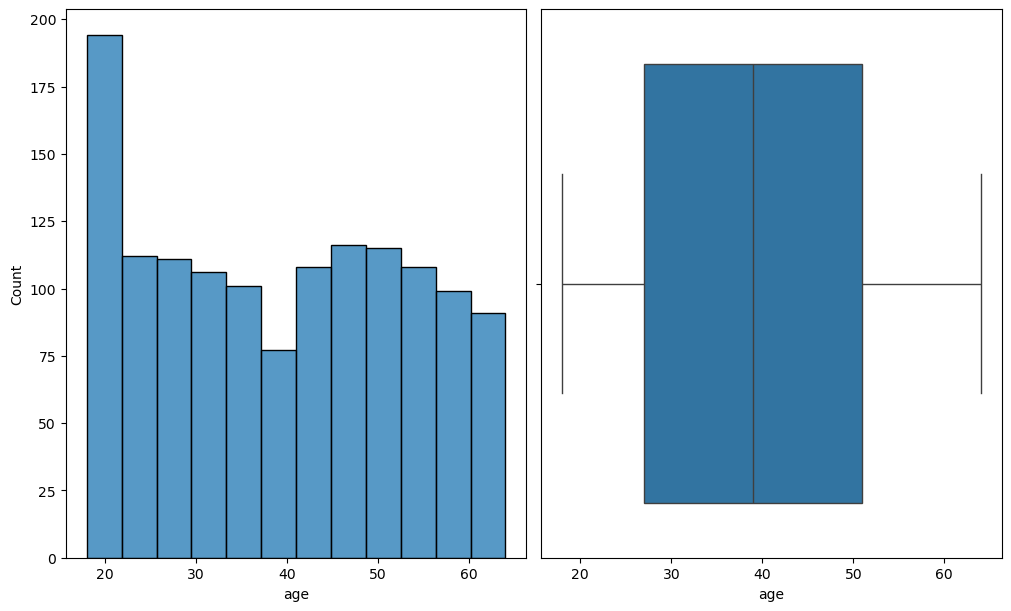

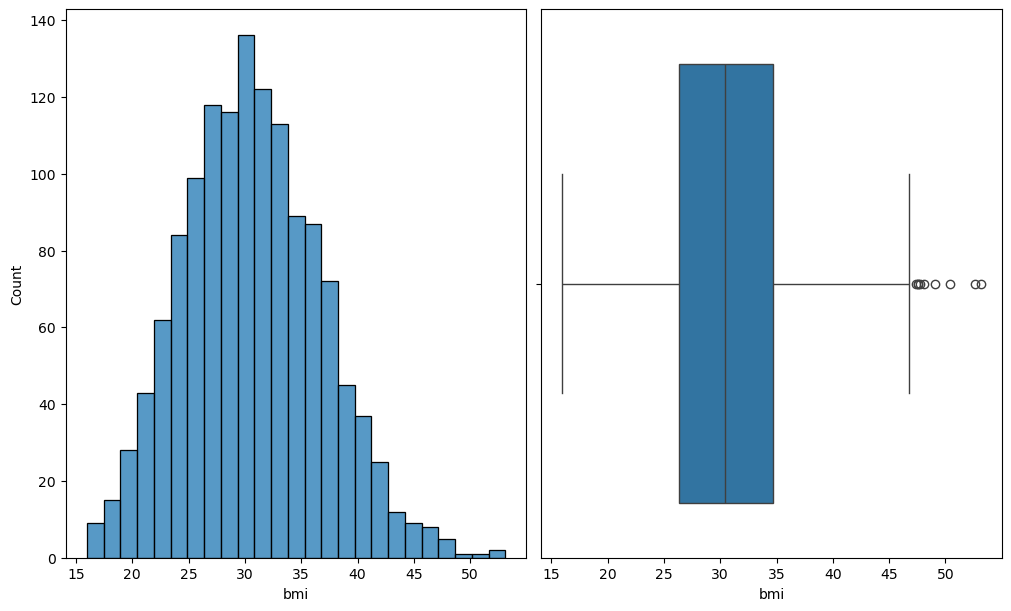

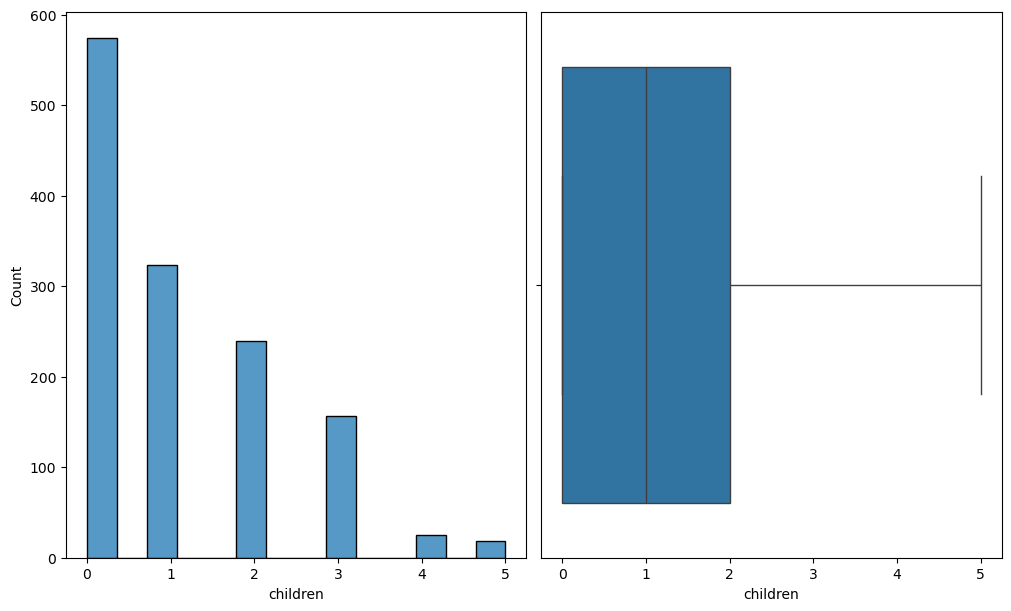

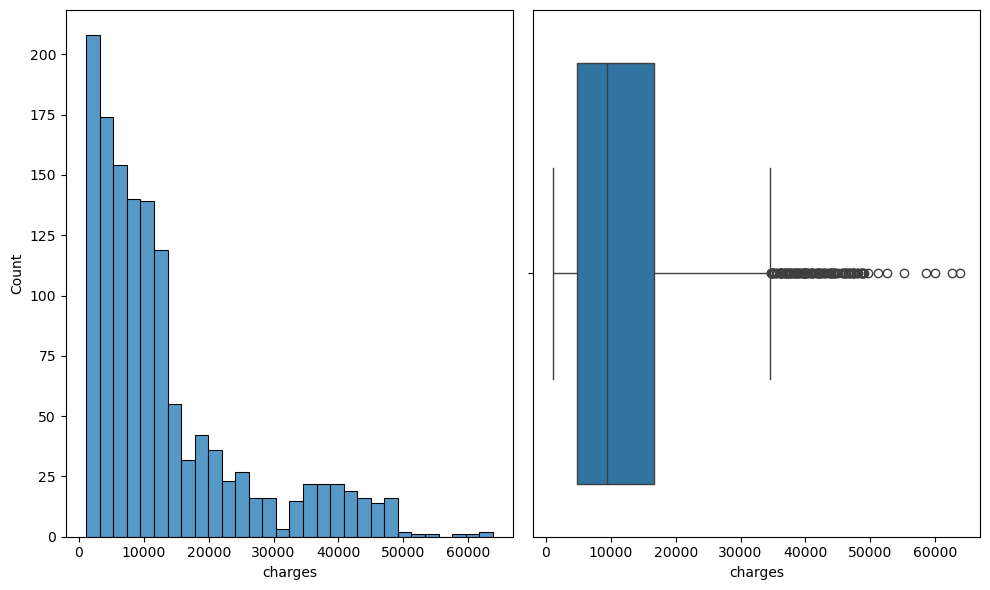

In [6]:
for column in dfNumericalValues.columns:
    plt.figure(figsize=(10, 6), constrained_layout=True)
    ax = plt.subplot(1, 2, 1)
    sns.histplot(dfNumericalValues, x=column, ax=ax)
    ax = plt.subplot(1, 2, 2)
    sns.boxplot(dfNumericalValues, x=column, ax=ax)

plt.tight_layout()
plt.show()

/tmp/ipykernel_3470/138003141.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
/tmp/ipykernel_3470/138003141.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
/tmp/ipykernel_3470/138003141.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


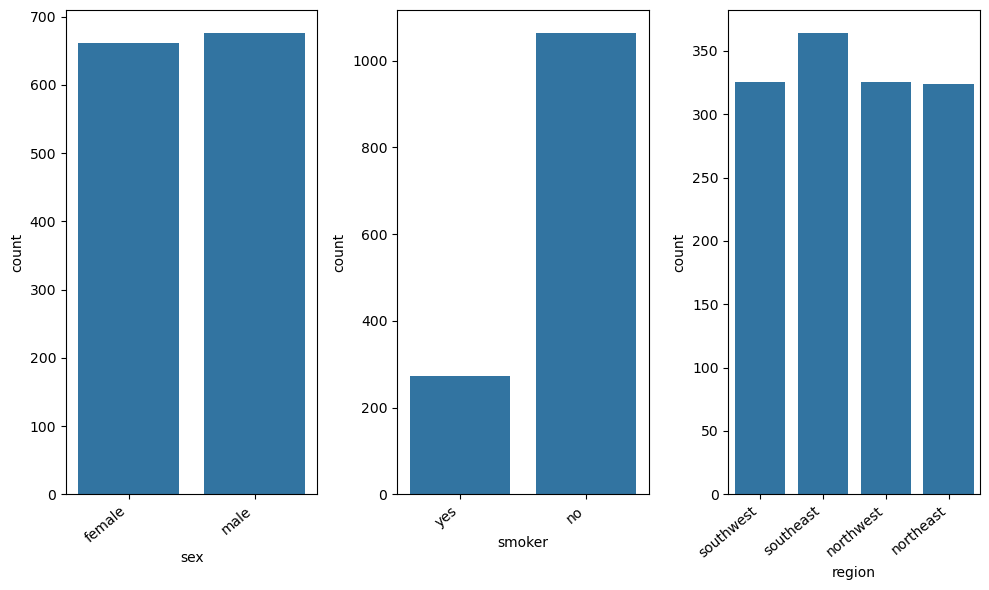

In [7]:
import math

rowPlots = math.ceil(len(dfCategoricalValues.columns) / 3)
i = 0

plt.figure(figsize=(10, 6), constrained_layout=True)


for column in dfCategoricalValues.columns:
    ax = plt.subplot(rowPlots, 3, i + 1)
    sns.countplot(dfCategoricalValues, x=column, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    i = i + 1

plt.tight_layout()
plt.show()

Para responder los siguientes cuestionamientos, genera los gráficos indicados:

2a) ¿Hay diferencias significativas de las primas según el sexo? Compara la distribución de la variable `charges` por medio de un boxplot.


**Respuesta:** No hay una diferencia significativa en los primeros dos cuartiles de los dos sexos, sin embargo, empezamos a notar una diferencia en el tercer cuartil y una diferencia muy grande en el cuarto cuartil, siendo los hombres en este segmento con un valor mas grande en la prima del seguro.

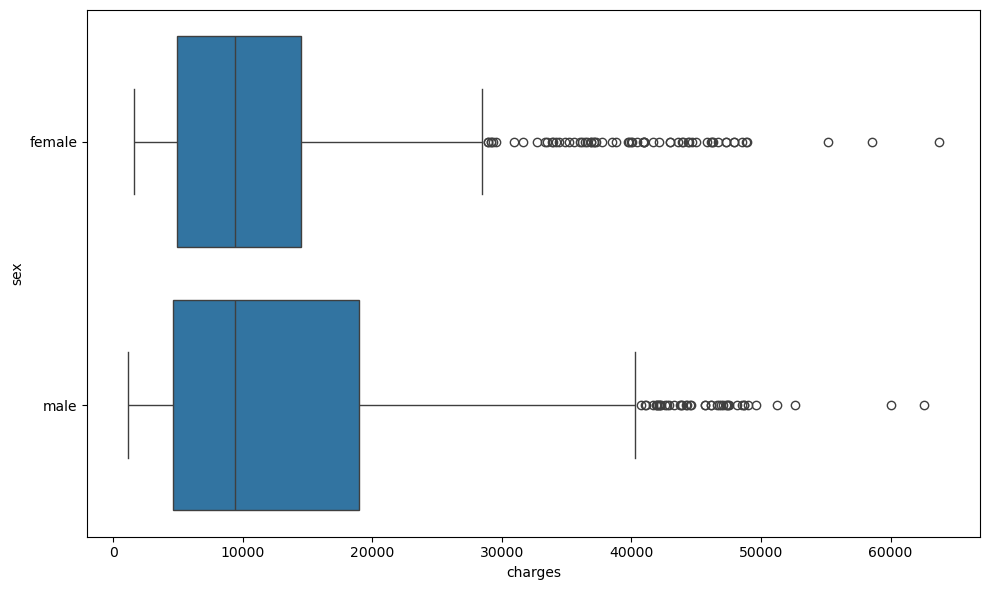

In [8]:
plt.figure(figsize=(10, 6), constrained_layout=True)
ax = sns.boxplot(insurance_df, x='charges', y='sex')
plt.tight_layout()
plt.show()

2b) Crea un diagrama de dispersión de `charges` versus el `bmi` que incorpore la distinción por las categorías `smoker` y `children` (tip: utiliza el parámetro `size`) ¿Hay alguna conclusión importante que se derive del gráfico?


**Respuesta:** Si, hay una clara distinción en la prima de los seguros entre una persona fumadora y no, siendo los fumadores cobrados una mayor prima de seguro.

<Figure size 1200x800 with 0 Axes>

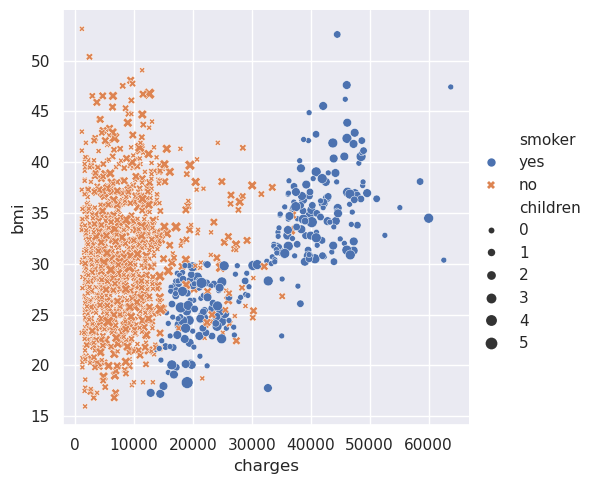

In [9]:
plt.figure(figsize=(12, 8), constrained_layout=True)
sns.set_theme()
sns.relplot(data=insurance_df,
    x="charges", y="bmi", #col="time",
    hue="smoker", style="smoker", size="children",
)
plt.show()

2c) Elabora un mapa de calor que muestre la correlación de las variables numéricas.

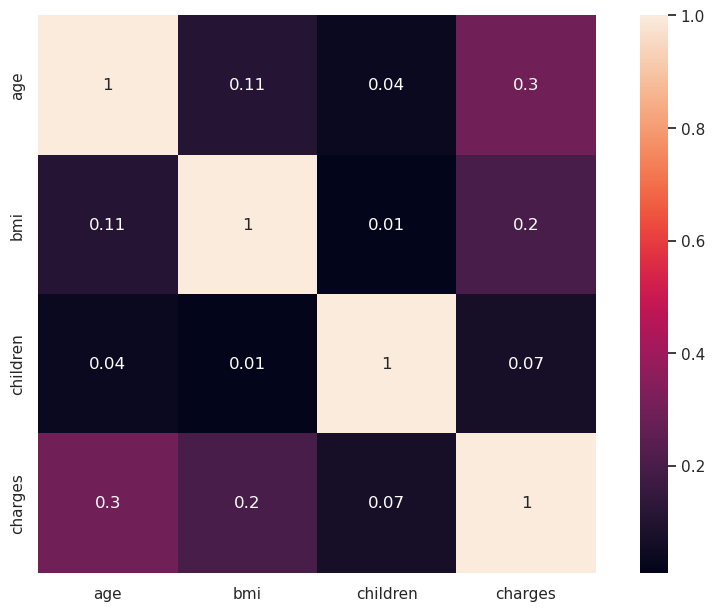

In [10]:
plt.figure(figsize=(10, 6), constrained_layout=True)

correlation = dfNumericalValues.corr(method='pearson', numeric_only=True)
sns.heatmap(round(correlation, 2), annot = True, square=True)

plt.show()

Obtén un dataframe con las observaciones que tengan valores atípicos en `charges`.

3a) ¿Cuál es el promedio de `age` y de `bmi`?

**Respuesta:**

El promedio de `age` es: 41.079137

El promedio de `bmi` es: 35.564604


In [11]:
q1 = insurance_df['charges'].quantile(0.25)  # Primer cuartil
q3 = insurance_df['charges'].quantile(0.75)  # Tercer cuartil
iqr = q3 - q1

# Definir límites para valores atípicos
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtrar valores que no son atípicos
filtered_df = insurance_df[(insurance_df['charges'] < lower_bound) | (insurance_df['charges'] > upper_bound)]

filtered_df

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


In [12]:
filtered_df.describe(exclude=['object'])

,age,bmi,children,charges
count,139.000000,139.000000,139.000000,139.000000
mean,41.079137,35.564604,1.187050,42103.947206
std,13.801420,4.434917,1.126546,5582.168107
min,18.000000,22.895000,0.000000,34617.840650
25%,30.000000,32.667500,0.000000,37786.149950
50%,43.000000,35.200000,1.000000,40974.164900
75%,52.500000,37.660000,2.000000,45786.706425
max,64.000000,52.580000,4.000000,63770.428010


3b) ¿Qué porcentaje de estas observaciones se corresponden a mujeres y a hombres? ¿A fumadores y no fumadores?

---

**Respuesta:**

El porcentaje de `mujeres` en los outliers es: 35.97122302158273%

El porcentaje de `hombres` en los outliers es: 64.02877697841727%

---

El porcentaje de `fumadores` en los outliers es: 97.84172661870504%

El porcentaje de `no fumadores` en los outliers es: 2.158273381294964%

In [13]:
dfWomen = filtered_df[filtered_df['sex'] == 'female']
dfSmoker = filtered_df[filtered_df['smoker'] == 'yes']

totalOutliers = len(filtered_df)

womenOutliers = len(dfWomen) / totalOutliers * 100
menOutliers = (totalOutliers - len(dfWomen)) / totalOutliers * 100

smokerOutliers = len(dfSmoker) / totalOutliers * 100
nonSmokerOutliers = (totalOutliers - len(dfSmoker)) / totalOutliers * 100

print('El porcentaje de mujeres en los outliers es: {}%'.format(womenOutliers))
print('El porcentaje de hombres en los outliers es: {}%'.format(menOutliers))

print('El porcentaje de fumadores en los outliers es: {}%'.format(smokerOutliers))
print('El porcentaje de no fumadores en los outliers es: {}%'.format(nonSmokerOutliers))



El porcentaje de mujeres en los outliers es: 35.97122302158273%
El porcentaje de hombres en los outliers es: 64.02877697841727%
El porcentaje de fumadores en los outliers es: 97.84172661870504%
El porcentaje de no fumadores en los outliers es: 2.158273381294964%


# **Parte 2**. Preprocesamiento

4. Separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`charges`).

In [14]:
y = insurance_df['charges'].copy()
x = insurance_df.drop('charges', axis=1)

y


0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

5. Divide el conjunto en entrenamiento y prueba (80:20) considerando:


*   El parámetro `random_state` con el valor de 1 para garantizar reproducibilidad.
*   Analiza los diagramas de barras obtenidos en el ejercicio 1c. Con los resultados observados, es conveniente usar la variable `smoker` en la estrategia de estratificación.
*   Como ya tienes separadas en `X` e `y` los predictores y salida, consulta cómo ejecutar la función `train_test_split()` para obtener `Xtrain, Xtest, ytrain, ytest` en una única instrucción.

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=x['smoker'])

6. Prepara un transformador, denominado `preprocessing`, para aplicar escalamiento *MinMax* a los predictores numéricos y codificación *one-hot* a los categóricas.

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder


numericAttributes = ['age', 'bmi', 'children']
categoricalAttributes = ['sex', 'smoker', 'region']

###############################################

pipelineNumeric = make_pipeline(preprocessing.MinMaxScaler())

###############################################

pipelineCategorical = make_pipeline(OneHotEncoder(handle_unknown="ignore"))

################################################################

preprocessing = make_column_transformer(
    (pipelineNumeric, make_column_selector(dtype_include=np.number)),
    (pipelineCategorical, make_column_selector(dtype_include=object)),
)

# **Parte 3**. Entrenando y evaluando el modelo de RL

7. Ejecuta un pipeline con el transformador creado y el algoritmo de regresión lineal para entrenar un modelo denominado `lr_model`.

Evalúa el modelo en el conjunto de prueba y obtén la raíz del error cuadrático medio (`RMSE`) y la métrica `R` cuadrado ($R^2$). Aunque ésta última la estudiarás a detalle la próxima semana, ahora sólo debes saber que toma valores entre 0 y 1, donde 1 indica un ajuste perfecto y, por tanto, un modelo muy fiable para las previsiones futuras. La función de scikit-learn que determina esta métrica es: [`r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

In [17]:
from sklearn.linear_model import LinearRegression

#X_train = preprocessing.fit_transform(X_train)

lr_model = make_pipeline(preprocessing, LinearRegression())
lr_model.fit(X_train, y_train)

lr_predictions = lr_model.predict(X_train)
lr_predictions[:5].round(-2)  # -2 = rounded to the nearest hundred




array([ 5300., 10700.,  4000., 11500., 34000.])

In [18]:
y_train[:5]

42      6272.4772
847     2438.0552
625     3736.4647
394     9411.0050
621    40182.2460
Name: charges, dtype: float64

In [19]:
from sklearn.metrics import mean_squared_error

lr_rmse = mean_squared_error(y_train, lr_predictions, squared=False)
lr_rmse

6133.440779211678

In [20]:
from sklearn.metrics import r2_score

lr_Score = r2_score(y_train, lr_predictions)
lr_Score

0.7493878255549784

**Valora el rendimiento del modelo con los siguientes cambios:**


8. Reemplaza los outliers de `charges` con el límite superior (`Q3 + 1.5 * IQR`). Haz el cambio en ambos conjuntos: `ytrain` y `ytest`, previo a la aplicación del mismo pipeline. Guarda el modelo como `lr_model2`.


In [21]:


y_train.loc[y_train < lower_bound] = lower_bound
y_train.loc[y_train > upper_bound] = upper_bound

y_test.loc[y_test < lower_bound] = lower_bound
y_test.loc[y_test > upper_bound] = upper_bound

#sns.boxplot(y_test)


lr_model2 = make_pipeline(preprocessing, LinearRegression())
lr_model2.fit(X_train, y_train)

lr_predictions2 = lr_model2.predict(X_train)


In [22]:
mean_squared_error(y_train, lr_predictions2, squared=False)

5173.337804048329

In [23]:
r2_score(y_train, lr_predictions2)

0.7434806752044553

9. Prepara otro transformador, denominado `preprocessing2`, para aplicar escalamiento estándar a los predictores numéricos y codificación ordinal a los categóricas. Aplícalo en un nuevo pipeline utilizando nuevamente regresión lineal. Guarda el modelo como `lr_model3`.

**Nota.** Los cambios se ejecutan de manera consecutiva, por ejemplo: el reemplazo de los outliers también se ejecuta previo al transformador `preprocessing2` y así sucesivamente.

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

###############################################

pipelineNumeric2 = make_pipeline(StandardScaler())

###############################################

pipelineCategorical2 = make_pipeline(OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan))

################################################################

preprocessing2 = make_column_transformer(
    (pipelineNumeric2, make_column_selector(dtype_include=np.number)),
    (pipelineCategorical2, make_column_selector(dtype_include=object)),
)

lr_model3 = make_pipeline(preprocessing, LinearRegression())
lr_model3.fit(X_train, y_train)

lr_predictions3 = lr_model.predict(X_train)

lr_predictions3

array([ 5312., 10688.,  4032., ..., 16064., 29248.,  8512.])

In [25]:
mean_squared_error(y_train, lr_predictions3, squared=False)

5537.426445578933

In [26]:
r2_score(y_train, lr_predictions3)

0.7061035406582905

10. Utiliza regresión polinomial para verificar si se produce un mejor ajuste. Intenta con varios grados, aunque debes dejar en el código sólo el de mejor rendimiento. Guarda el modelo como `lr_model4`.

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures

def findBestDegree(preprocessor: ColumnTransformer):
    rmses = []
    degrees = np.arange(1, 4)
    min_rmse, min_deg = 1e10, 0

    for deg in degrees:

        poly_reg_model = make_pipeline(preprocessor, PolynomialFeatures(degree=deg, include_bias=False), LinearRegression())
        poly_reg_model.fit(X_train, y_train)
        poly_reg_y_predicted = poly_reg_model.predict(X_test)

        poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))
        rmses.append(poly_reg_rmse)

        # Cross-validation of degree
        if min_rmse > poly_reg_rmse:
            min_rmse = poly_reg_rmse
            min_deg = deg

    # Plot and present results
    print('Best degree {} with RMSE {}'.format(min_deg, min_rmse))

    plt.plot(degrees, rmses)
    plt.yscale('log')
    plt.xlabel('Degree')
    plt.ylabel('RMSE')

    return (min_deg, min_rmse)



Best degree 2 with RMSE 4285.570310965561


(2, 4285.570310965561)

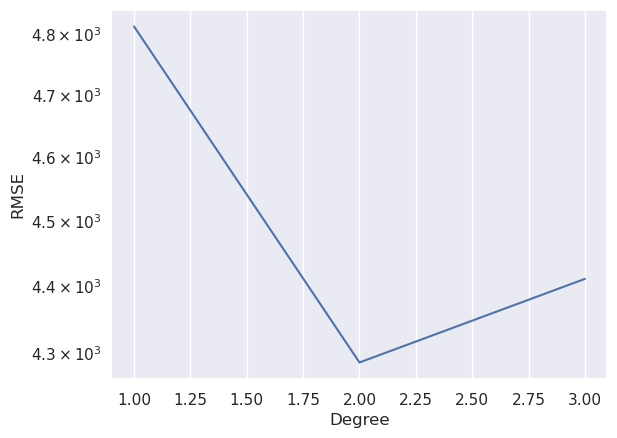

In [28]:
findBestDegree(preprocessing2)

In [29]:
from sklearn.metrics import r2_score
lr_model4 = make_pipeline(preprocessing2, PolynomialFeatures(degree=2, include_bias=False), LinearRegression())
lr_model4.fit(X_train, y_train)
lr_predictions4 = lr_model4.predict(X_test)

np.sqrt(mean_squared_error(y_test, lr_predictions4))
print('The Root Mean Square Error (RMSE) is:', mean_squared_error(y_test, lr_predictions4))
print('The R square (R2) is:', r2_score(y_test, lr_predictions4))

The Root Mean Square Error (RMSE) is: 18366112.89022945
The R square (R2) is: 0.8126404302016094
